# Statistical Testing Flowchart

<img src="Statistical_Testing_Flowchart.jpg" style="width:700px;height:1000px;background-color:white">

# 0. Imports

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import statsmodels.formula.api as smf

In [2]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/researchpy/Data-sets/master/blood_pressure.csv"
)

# 1. Parametric Assumptions

## 1.1. Independence

This assumption is checked during the setup of the study. It means that each observation is independent of another; if there are 2 or more groups being compared, then it refers to that fact that groups are mutually exclusive, i.e. each individual belongs to only 1 group; and that the data is not repeated over time.

If data is repeated measures, longitudinal/panel or time series, there are appropriate methods to account for the repeated data points from individuals. This is typically handled in the math of the statistical test that is designed to analyze this type of data.

## 1.2. Normality

### **1.2.1. Shapiro-Wilk (SW) Test**

The null hypothesis is that the data is normal. The Shapiro-Wilk test is an omnibus test (D'Agostino, 1971). It evaluates normality by comparing the data's distribution (values ordered) to the hypothesized normal distribution (Shapiro & Wilk, 1965). This can be completed in Python by using the `shapiro()` method from `scipy.stats`.

In [3]:
# Coming from independent t-test framework

sampling_difference = (
    df["bp_after"][df["sex"] == "Male"].values
    - df["bp_after"][df["sex"] == "Female"].values
)

stats.shapiro(sampling_difference)

ShapiroResult(statistic=0.9858611226081848, pvalue=0.7147841453552246)

In [4]:
# From regression or ANOVA framework

model = smf.ols("bp_after ~ C(sex) + C(agegrp)", data=df).fit()

stats.shapiro(model.resid)

ShapiroResult(statistic=0.9816308617591858, pvalue=0.10094080120325089)

### 1.2.2. D'Agostino-Pearson K2 Test

The null hypothesis is that the data is normal. The D'Agostino-Pearson test is an omnibus test and evaluates normality by assessing the skewness and kurtosis (D'Agostino, 1971).

In [5]:
# Coming from independent t-test framework

sampling_difference = (
    df["bp_after"][df["sex"] == "Male"].values
    - df["bp_after"][df["sex"] == "Female"].values
)

stats.normaltest(sampling_difference)

NormaltestResult(statistic=0.003175119018886905, pvalue=0.9984136999965528)

In [6]:
# From regression or ANOVA framework

model = smf.ols("bp_after ~ C(sex) + C(agegrp)", data=df).fit()

stats.normaltest(model.resid)

NormaltestResult(statistic=2.962603751831582, pvalue=0.22734152518547723)

### 1.2.3. Kolmogorov-Smirnov (KS) Test

The null hypothesis is that the data is normal (matches compared distribution). The Kolmogorov-Smirnov test is a distance test (D'Agostino, 1971). It evaluates normality by comparing the data's empirical distribution function to the expected cumulative distribution function of the comparison distribution (Öztuna D., Elhan A., & Tüccar, 2006).

If testing the difference between two groups, then this can be completed using the `ks_2samp()` method from `scipy.stats`.

In [7]:
stats.ks_2samp(
    df["bp_after"][df["sex"] == "Male"], df["bp_after"][df["sex"] == "Female"]
)

KstestResult(statistic=0.36666666666666664, pvalue=0.0005569710611454617)

If coming from a regression or ANOVA approach then the 1 sample version of the test can be ran on the residuals using the `kstest()` method from `scipy.stats`.

In [8]:
model = smf.ols("bp_after ~ C(sex) + C(agegrp)", data=df).fit()

stats.kstest(model.resid, "norm")

KstestResult(statistic=0.45021797084392334, pvalue=1.0174625716706997e-22)

### 1.2.4. Anderson-Darling

The null hypothesis is that the data is normal (matches compared distribution). The Anderson-Darling test assess normality by comparing the data's empirical distribution function to a specified distribution's cumulative distribution function (Stephen, 1974). This can be completed using the `anderson()` method from `scipy.stats`.

A note about this method, it returns 3 parts: the test statistic, an array of significance levels, and an array of corresponding critical values. The test statistic needs to be compared to the critical value for the significance level of interest- this is most commonly set to 0.05.

In [9]:
# Coming from mean comparison framework (independent sample t-test)

sampling_difference = (
    df["bp_after"][df["sex"] == "Male"].values
    - df["bp_after"][df["sex"] == "Female"].values
)

result = stats.anderson(sampling_difference)

In [10]:
print(f"Test statistic: {result.statistic: .4f}")

for i in range(len(result.critical_values)):
    sig, crit = result.significance_level[i], result.critical_values[i]

    if result.statistic < result.critical_values[i]:
        print(
            f"At {sig}% significance,{result.statistic: .4f} <{result.critical_values[i]: .4f} data looks normal (fail to reject H0)"
        )
    else:
        print(
            f"At {sig}% significance,{result.statistic: .4f} >{result.critical_values[i]: .4f} data does not look normal (reject H0)"
        )

Test statistic:  0.2987
At 15.0% significance, 0.2987 < 0.5440 data looks normal (fail to reject H0)
At 10.0% significance, 0.2987 < 0.6190 data looks normal (fail to reject H0)
At 5.0% significance, 0.2987 < 0.7430 data looks normal (fail to reject H0)
At 2.5% significance, 0.2987 < 0.8660 data looks normal (fail to reject H0)
At 1.0% significance, 0.2987 < 1.0300 data looks normal (fail to reject H0)


In [11]:
# From regression or ANOVA framework

model = smf.ols("bp_after ~ C(sex) + C(agegrp)", data=df).fit()

result = stats.anderson(model.resid)

In [12]:
print(f"Test statistic: {result.statistic: .4f}")
for i in range(len(result.critical_values)):
    sig, crit = result.significance_level[i], result.critical_values[i]

    if result.statistic < result.critical_values[i]:
        print(
            f"At {sig}% significance,{result.statistic: .4f} <{result.critical_values[i]: .4f} data looks normal (fail to reject H0)"
        )
    else:
        print(
            f"At {sig}% significance,{result.statistic: .4f} >{result.critical_values[i]: .4f} data does not look normal (reject H0)"
        )

Test statistic:  0.4467
At 15.0% significance, 0.4467 < 0.5580 data looks normal (fail to reject H0)
At 10.0% significance, 0.4467 < 0.6360 data looks normal (fail to reject H0)
At 5.0% significance, 0.4467 < 0.7630 data looks normal (fail to reject H0)
At 2.5% significance, 0.4467 < 0.8900 data looks normal (fail to reject H0)
At 1.0% significance, 0.4467 < 1.0590 data looks normal (fail to reject H0)


### 1.2.5. Q-Q Plot

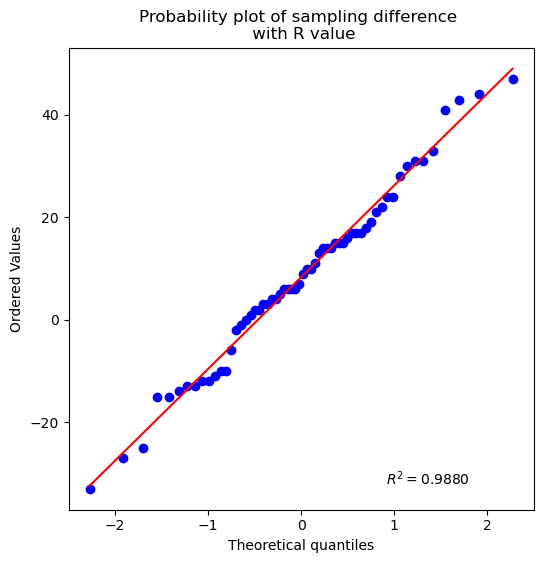

In [13]:
sampling_difference = (
    df["bp_after"][df["sex"] == "Male"].values
    - df["bp_after"][df["sex"] == "Female"].values
)

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(sampling_difference, plot=plt, rvalue=True)
ax.set_title("Probability plot of sampling difference \n with R value")
ax.set

plt.show()

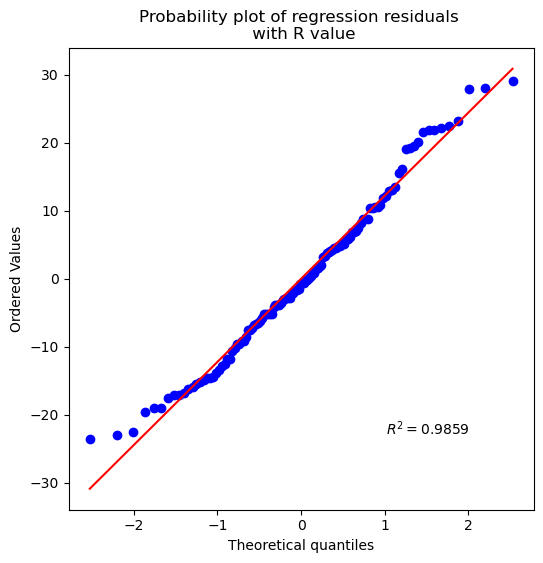

In [14]:
# From regression or ANOVA framework

model = smf.ols("bp_after ~ C(sex) + C(agegrp)", data=df).fit()

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(model.resid, plot=plt, rvalue=True)
ax.set_title("Probability plot of regression residuals \n with R value")
ax.set

plt.show()

## 1.3. Homogeneity of Variances

### 1.3.1. Barlett's Test

Barlett's test is used to test if the groups, which can be referred to as k, have equal variances. Barlett's test can test for equality between 2 or more groups.

This can be done with the `bartlet()` method from `scipy.stats`.

In [15]:
stats.bartlett(
    df["bp_after"][df["sex"] == "Male"], df["bp_after"][df["sex"] == "Female"]
)

BartlettResult(statistic=3.9379638422812793, pvalue=0.047207884641474476)

### **1.3.2. Levene's Test**

Levene's test tests if the different goups have equal variances (Levene, 1960). Levene's test is less sensitive than Barlett's test to departures from normality and power (Conover, 1981). Levene's test of homogeneity of variances can test for equality between 2 or more groups. The original suggestion was to use the mean, Brown and Forsythe (1974) provided an expansion and testing can also be calculated using the median or the trimmed mean which have been found to be robust under nonnormality.

This can be done with the `levene()` method from `scipy.stats`.

In [16]:
# Using the mean

stats.levene(df["bp_after"][df["sex"] == "Male"], df["bp_after"][df["sex"] == "Female"])

LeveneResult(statistic=5.0464151793144625, pvalue=0.026537264851214513)

In [17]:
# Using the median

stats.levene(
    df["bp_after"][df["sex"] == "Male"],
    df["bp_after"][df["sex"] == "Female"],
    center="median",
)

LeveneResult(statistic=5.0464151793144625, pvalue=0.026537264851214513)

In [18]:
# Using the trimmed mean (Default is to cut 10% total - 5% from each tail)

stats.levene(
    df["bp_after"][df["sex"] == "Male"],
    df["bp_after"][df["sex"] == "Female"],
    center="trimmed",
)

LeveneResult(statistic=7.769755793226307, pvalue=0.006297605035462623)